In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as  pd
import os

import pyOpenLPT as lpt
redirector = lpt.PythonStreamRedirector()

def print_dict(dict):
    for key in dict:
        print(key+":", dict[key])
    print('')

In [4]:
import pybind11
print(np.__version__)
print(pd.__version__)
print(pybind11.__version__)

1.26.2
2.1.4
2.13.0


In [3]:
# run openlpt 
config_file = '../../test/inputs/test_STB/config_python.txt'
lpt.run(config_file)

**************
OpenLPT start!
**************

Load config file: ../../test/inputs/test_STB/config_python.txt

Start Calibrating OTF!
Camera 0
	Number of found tracers in each image: 11679(1000),
	a_mean = 97.701; a_std = 14.7549; a_max = 124; a = 124
	(a,b,c,alpha) = 124,0.616924,0.629476,0
Camera 1
	Number of found tracers in each image: 11470(1000),
	a_mean = 99.407; a_std = 15.6012; a_max = 124; a = 124
	(a,b,c,alpha) = 124,0.621786,0.61965,0
Camera 2
	Number of found tracers in each image: 11462(1000),
	a_mean = 98.268; a_std = 15.2687; a_max = 124; a = 124
	(a,b,c,alpha) = 124,0.615483,0.621399,0
Camera 3
	Number of found tracers in each image: 11331(1000),
	a_mean = 98.158; a_std = 14.7392; a_max = 124; a = 124
	(a,b,c,alpha) = 124,0.627592,0.611969,0
Finish Calibrating OTF!

Initial phase at frame 0
	Number of found tracers in each camera: 11679,11470,11462,11331,
	Finish stereomatching: n_before_del = 13632.
	Finish deleting gohst match: n_del = 4269, n_after_del = 9363.
	Match

In [12]:
# load tracer tracks 
def load_csv(directory, keywords):
    # Get list of files in the directory
    files = os.listdir(directory)
    
    # Filter files that are CSV and contain any of the keywords
    matched_files = [f for f in files if f.endswith('.csv') and any(keyword in f for keyword in keywords)]
    
    # Load matched CSV files into DataFrames
    df_list = {}
    for file in matched_files:
        file_path = os.path.join(directory, file)
        df_list[file] = pd.read_csv(file_path)
    
    return df_list

def load_tracks(folder, load_previous=False):
    tracks = pd.DataFrame()
    
    # load latest tracks 
    df_list = load_csv(folder, ['ExitTrack', 'LongTrackActive', 'LongTrackInactive'])
    
    for key in df_list:
        df = df_list[key]
        df['TrackID'] += tracks.shape[0]
        tracks = pd.concat([tracks, df], axis=0, ignore_index=True)
        
    if load_previous:
        # load previous converge tracks
        subfolder = os.path.join(folder, 'ConvergeTrack')
        df_list = load_csv(subfolder, ['ExitTrack', 'LongTrackInactive'])
        
        for key in df_list:
            df = df_list[key]
            df['TrackID'] += tracks.shape[0]
            tracks = pd.concat([tracks, df], axis=0, ignore_index=True)
    
    return tracks
    
tracks = load_tracks('../../test/results/test_STB/Tracer_0/')
tracks.head()

,TrackID,FrameID,WorldX,WorldY,WorldZ,Error,Ncam,cam0_x(col),cam0_y(row),cam1_x(col),cam1_y(row),cam2_x(col),cam2_y(row),cam3_x(col),cam3_y(row)
0,0,0,3.49344,-12.7187,-19.8970,0.000882,2,787.447,1008.74,-10.000,-10.000,594.023,941.099,-10.000,-10.00
1,0,1,3.49473,-12.7037,-19.9111,0.000527,2,787.084,1009.09,-10.000,-10.000,593.824,941.494,-10.000,-10.00
2,0,2,3.51624,-12.7018,-19.9260,0.009369,3,786.870,1009.49,676.090,993.779,593.324,941.847,-10.000,-10.00
3,0,3,3.50807,-12.6806,-19.9404,0.005175,3,786.437,1009.84,675.721,994.158,593.267,942.279,-10.000,-10.00
4,0,4,3.50927,-12.6598,-19.9559,0.000125,4,785.937,1010.22,675.571,994.564,593.005,942.724,197.334,1031.19


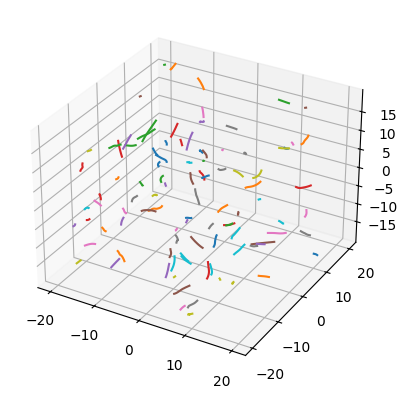

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n_plot = 100
id_list = np.random.choice(tracks['TrackID'].unique(), n_plot, replace=False)
for i in range(n_plot):
    track = tracks[tracks['TrackID'] == id_list[i]]
    ax.plot(track['WorldX'], track['WorldY'], track['WorldZ'])
